*** This practice is based on the tutorial (5-Day Data Challege Day three: Data Cleaning Challenge: Parsing Dates) given by Rachael Tatman on Kaggle ***

In [46]:
# modules we'll use
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
# read in our data
earthquakes = pd.read_csv("../data/database 2.csv")
landslides = pd.read_csv("../data/catalog.csv")
volcanos = pd.read_csv("../data/database.csv")

# set seed for reproducibility
np.random.seed(0)

%matplotlib inline

*** First take a look at the data ***

In [47]:
# earthquakes.head() # Date column
# landslides.sample(5) # date column
print(landslides['date'].head())
print(earthquakes['Date'].head())
landslides['date'].dtype # 'O' means object

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object
0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object


dtype('O')

> Pandas uses the "object" dtype for storing various types of data types, but most often when you see a column with the dtype "object" it will have strings in it. 

Check the pandas dtype documentation [here](http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), you'll notice that there's also a specific `datetime64` dtypes. Because the dtype of our column is `object` rather than `datetime64`, we can tell that Python doesn't know that this column contains dates.

# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

1. Check the null/Nan numbers in 'date' column of landslides
2. Create a new column called 'date_parse' store the datetime64 format
3. Check the null/Nan numbers in 'date_parsed' column of landslides

In [48]:
print(landslides['date'].isnull().sum()) #check null/NaN numbers
# create a new column, date_parsed, with the parsed dates,
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")
print(landslides['date_parsed'].isnull().sum())
landslides['date_parsed'].head()

3
3


0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

1. Try to create a new column called 'date_parse' in earthquakes store the datetime64 format (Error raises due to date format).
2. Let pandas choose the format automatically. 
Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

In [49]:
#earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], format = "%m/%d/%y")
earthquakes['date_parsed'] = pd.to_datetime(earthquakes['Date'], infer_datetime_format=True)

1. Get the day of the month from the date_parsed column 
2. Get the month of the year form the data_parsed column

In [50]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_earthquakes = earthquakes['date_parsed'].dt.day
month_of_year_landslides = landslides['date_parsed'].dt.month
month_of_year_earthquakes = earthquakes['date_parsed'].dt.month

# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

Before plotting, don't forget to drop nan values

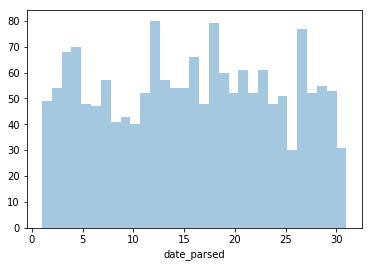

In [51]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month with sns
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Text(0.5,0,'date_parsed')

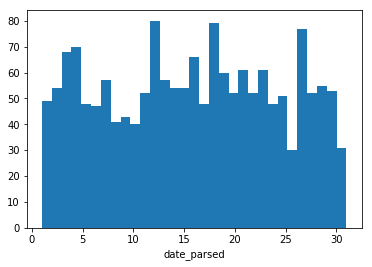

In [52]:
# plot the day of the month with plt
plt.hist(day_of_month_landslides,bins=31)
plt.xlabel('date_parsed')

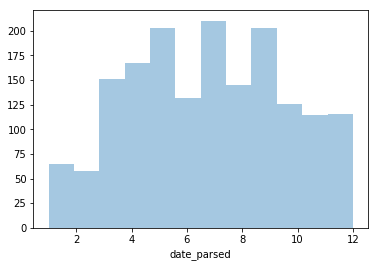

In [55]:
# remove na's
month_of_year_landslides = month_of_year_landslides.dropna()

# plot the day of the month with sns
sns.distplot(month_of_year_landslides ,kde=False, bins=12)